# La Lune et la Terre

<div class='alert alert-info'>
    <p>Aprés avoir simuler l'infiniment petit allons vers l'infiniment grand : le système solaire</p>
</div>

## Introduction

La loi de la gravitation ou loi de l'attraction universelle, découverte par Isaac Newton, voir figure 1, est la loi décrivant la gravitation comme une force responsable de la chute des corps et du mouvement des corps célestes, et de façon générale, de l'attraction entre des corps ayant une masse, par exemple les planètes, les satellites naturels ou artificiels.

<p>
<img src="./Images/Systeme_planetaire/IsaacNewton.jpg" alt width=150 heigth=150>
<center>Fig. 1 Isaac Newton (1642-1727), philosophe, mathématicien, physicien, alchimiste, astronome et théologien britannique !</center>
<p>
Deux corps ponctuels de masses respectives $M_A$ et $M_B$ s'attirent avec des forces de mêmes valeurs (mais vectoriellement opposées), proportionnelles à  chacune des masses, et inversement proportionnelle au carré de la distance qui les sépare. Cette force a pour direction la droite passant par les centres de gravité de ces deux corps. 

La force exercée sur le corps $B$ par le corps $A$ est donnée par:

$$
\vec{F}_{A/B}=\mathcal{G}\frac{M_AM_B}{r^2}\vec{u}_{B\rightarrow A} 
$$

avec $\mathcal{G}=6.67\times10^{-11}$~Nm$^2$/kg$^2$, la constante de gravitation universelle, $r$ la distance entre les corps $A$ et $B$ et $\vec{u}_{B\rightarrow A}$ un vecteur unitaire dirigé de $B$ vers $A$.

Ainsi la Terre attire la lune grâce à la force de gravitation universelle. Par conséquent, la lune doit forcément tomber sur la Terre ! Le but de cette séance de déterminer à quelle echéance if faudra commencer à  s'inquiéter...
    
<p>
<img src="./Images/Systeme_planetaire/Giantimpact.gif" alt width=250 heigth=250>
<center>Fig. 2 La lune va-t-elle donc tomber sur la Terre ?</center>
<p>





<div class='alert alert-success'><strong>Question 1</strong>
    
Que vaut la norme de l'accélération $\vec{g}$ de la pesanteur ? On donne $m_T=5.97\times10^{24}$kg et $r_T=6370$km de la terre
</div>

In [1]:
import numpy as np
from numpy import exp, sin, cos, log, tan, pi, sqrt
import matplotlib.pyplot as plt
import matplotlib.animation as animation

mT = 5.97*1e24; rT = 6370*1e3; G=6.67*1e-11
#Alors soit une masse de 1kg on a g = G*mT/rT**2
g = G*mT/(rT**2)

## La Lune tourne autour de la Terre...

Pour prédire la trajectoire de la Lune, nous allons intégrer son accélération par rapport au temps.

<div class='alert alert-success'><strong>Question 2</strong>
    
Choisir le repère et le système qui permet d'établir l'équation de la trajectoire de la Lune.
</div>

In [2]:
#On choisit le référentiel terreste

<div class='alert alert-success'><strong>Question 3</strong>
    
Donner l'expression de la force d'attraction de la Terre sur la Lune en fonction des coordonnées $x_L$, $y_L$, $z_L$, $x_T$, $y_T$, $z_T$ de la Lune et de la Terre.
</div>

In [3]:
# u_TL= np.array([xL, yL, zL])/sqrt(xL**2+yL**2+zL**2)
# F_TL = -G*(mT*mL)/(xL**2+yL**2+zL**2) * u_TL

<div class='alert alert-success'><strong>Question 4</strong>
    
Définir les constantes du problème et les valeurs initiales de la position $\vec{r}_0$ et de la vitesse $\vec{v}_0$ de la Lune. On donne la distance Terre-Lune $d_{TL}=384 399$km, la masse de la Lune $m_L=7.35\times10^{22}$kg.
</div>

In [11]:
#cf apres


<div class='alert alert-success'><strong>Question 5</strong>
    
Réaliser la boucle temporelle permettant de calculer la trajectoire de la Lune à l'aide de l'algorithme de Verlet et Euler.
</div>

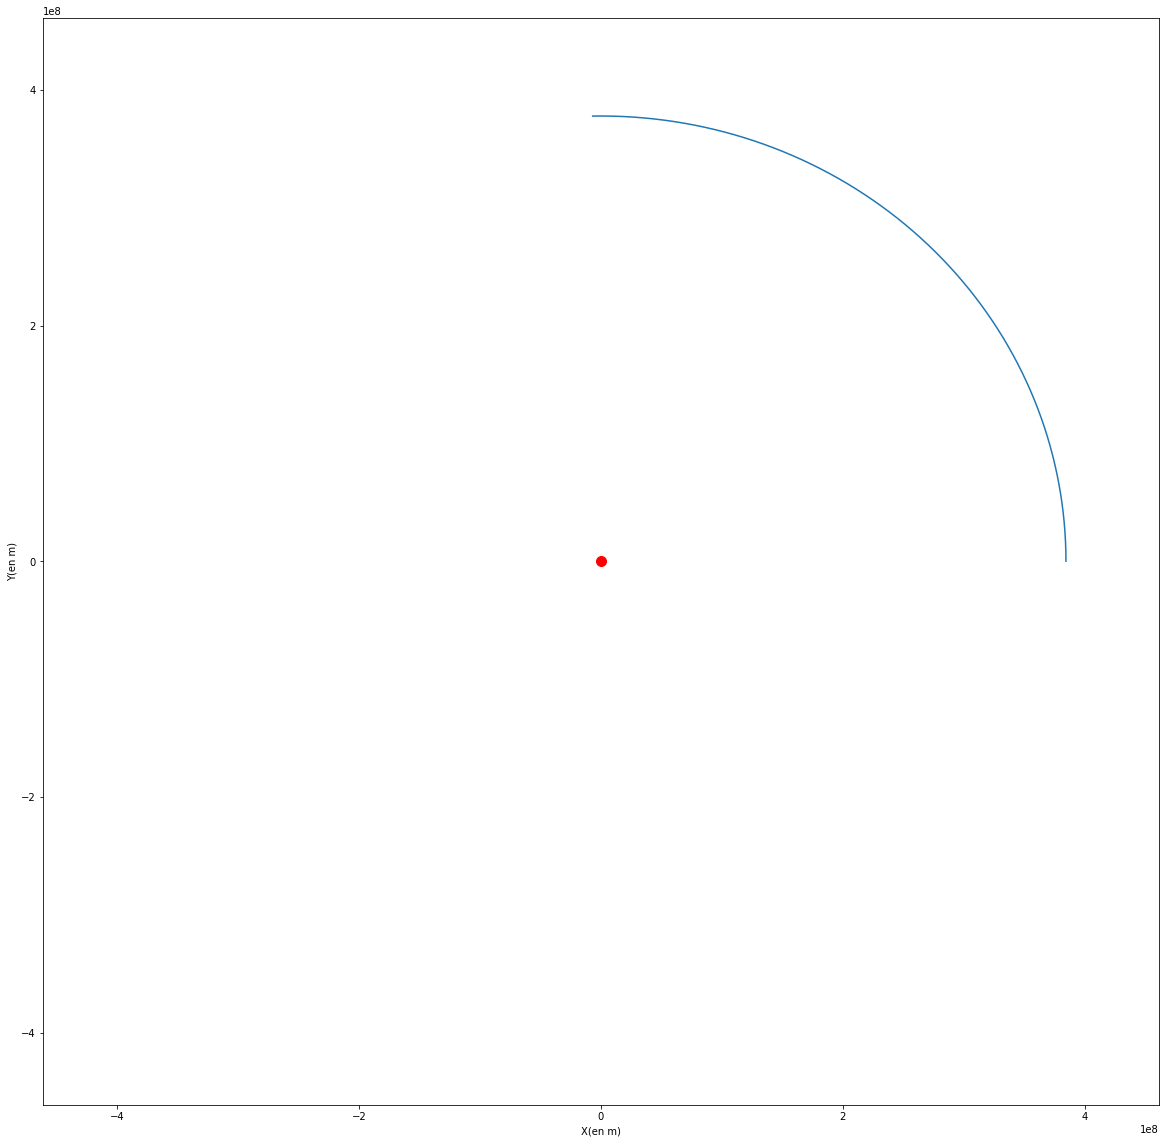

In [57]:
#Avec newton: force = m*a = m*dv/dt
#Euler explicite:
#On initie les valeurs:
xL=384399*1e3; yL=0; zL=0; mL=7.35*1e22
r0 = np.array([xL, yL, zL])
v0 = np.array([0, 1000, 0])
dt = 60 #pas de temps

N = int(1e4) #nombre de temps
V = np.zeros((N,3))
V[0, :] = v0
R = np.zeros((N, 3))
R[0, :] = r0




u_TL= r0/sqrt(xL**2+yL**2+zL**2)
F_TL = -G*(mT*mL)/(xL**2+yL**2+zL**2) * u_TL
for i in range(N-1):
    V[i+1,:] = V[i,:] + (dt/mL)*F_TL
    
    R[i+1,:] = R[i,:] + dt*V[i,:]
    
    u_TL= R[i]/sqrt(xL**2+yL**2+zL**2)
    F_TL = -G*(mT*mL)/(xL**2+yL**2+zL**2) * u_TL
    if sqrt(R[i, 0]**2 + R[i, 1]**2 + R[i, 2]**2) <= rT:
        print("Impact")
        print(dt*i/3600)
        break

fig, ax = plt.subplots(figsize = (20,20))
ax.set_xlabel('X(en m)')
ax.set_ylabel('Y(en m)')
ax.scatter(0, 0, label='Terre', color='red', s=100)
ax.set(xlim=(-384399*1e3*1.2, 384399*1e3*1.2), ylim=(-384399*1e3*1.2,384399*1e3*1.2))
ax.plot(R[:,0], R[:,1], ms = 2)

<div class='alert alert-success'><strong>Question 6</strong>
    
Quelle condition doit être remplie pour ne pas que la lune percute la Terre?
</div>

<div class='alert alert-success'><strong>Question 7</strong>
    
Quelles sont les trois types de trajectoire que pourrait connaitre la Lune en fonction des conditions initiales? (On supposera que $\vec{v}_0$ est perpendiculaire au vecteur allant de la Lune à  la Terre).
</div>